In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [19]:
data = pd.read_excel(r'kog_analyze.xlsx')
data.head()

,user_id,date,price
0,A0005,2020-03-25,50
1,A0005,2020-03-25,40
2,A0005,2020-03-26,70
3,A0005,2020-03-27,20
4,A0005,2020-03-29,50


In [20]:
data.isna().sum()

user_id    0
date       0
price      0
dtype: int64

In [21]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [22]:
data['month_year'] = data.date.apply(get_month)
data.head()

,user_id,date,price,month_year
0,A0005,2020-03-25,50,2020-03-01
1,A0005,2020-03-25,40,2020-03-01
2,A0005,2020-03-26,70,2020-03-01
3,A0005,2020-03-27,20,2020-03-01
4,A0005,2020-03-29,50,2020-03-01


In [23]:
data['cohortMonth'] = data.groupby('user_id')['month_year'].transform('min')
data.head(40)

,user_id,date,price,month_year,cohortMonth
0,A0005,2020-03-25,50,2020-03-01,2020-03-01
1,A0005,2020-03-25,40,2020-03-01,2020-03-01
2,A0005,2020-03-26,70,2020-03-01,2020-03-01
3,A0005,2020-03-27,20,2020-03-01,2020-03-01
4,A0005,2020-03-29,50,2020-03-01,2020-03-01
5,A0005,2020-03-31,50,2020-03-01,2020-03-01
6,A0005,2020-03-31,40,2020-03-01,2020-03-01
7,A0005,2020-04-01,100,2020-04-01,2020-03-01
8,A0005,2020-04-02,40,2020-04-01,2020-03-01
9,A0005,2020-04-04,70,2020-04-01,2020-03-01


In [24]:
def get_date(df, column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year, month, day

In [25]:
date_year, date_month, _ = get_date(data, 'date')
cohort_year, cohort_month, _ = get_date(data, 'cohortMonth')

year_diff = date_year-cohort_year
month_diff = date_month-cohort_month

data['cohort_index']=year_diff * 12 + month_diff + 1
data.head()

,user_id,date,price,month_year,cohortMonth,cohort_index
0,A0005,2020-03-25,50,2020-03-01,2020-03-01,1
1,A0005,2020-03-25,40,2020-03-01,2020-03-01,1
2,A0005,2020-03-26,70,2020-03-01,2020-03-01,1
3,A0005,2020-03-27,20,2020-03-01,2020-03-01,1
4,A0005,2020-03-29,50,2020-03-01,2020-03-01,1


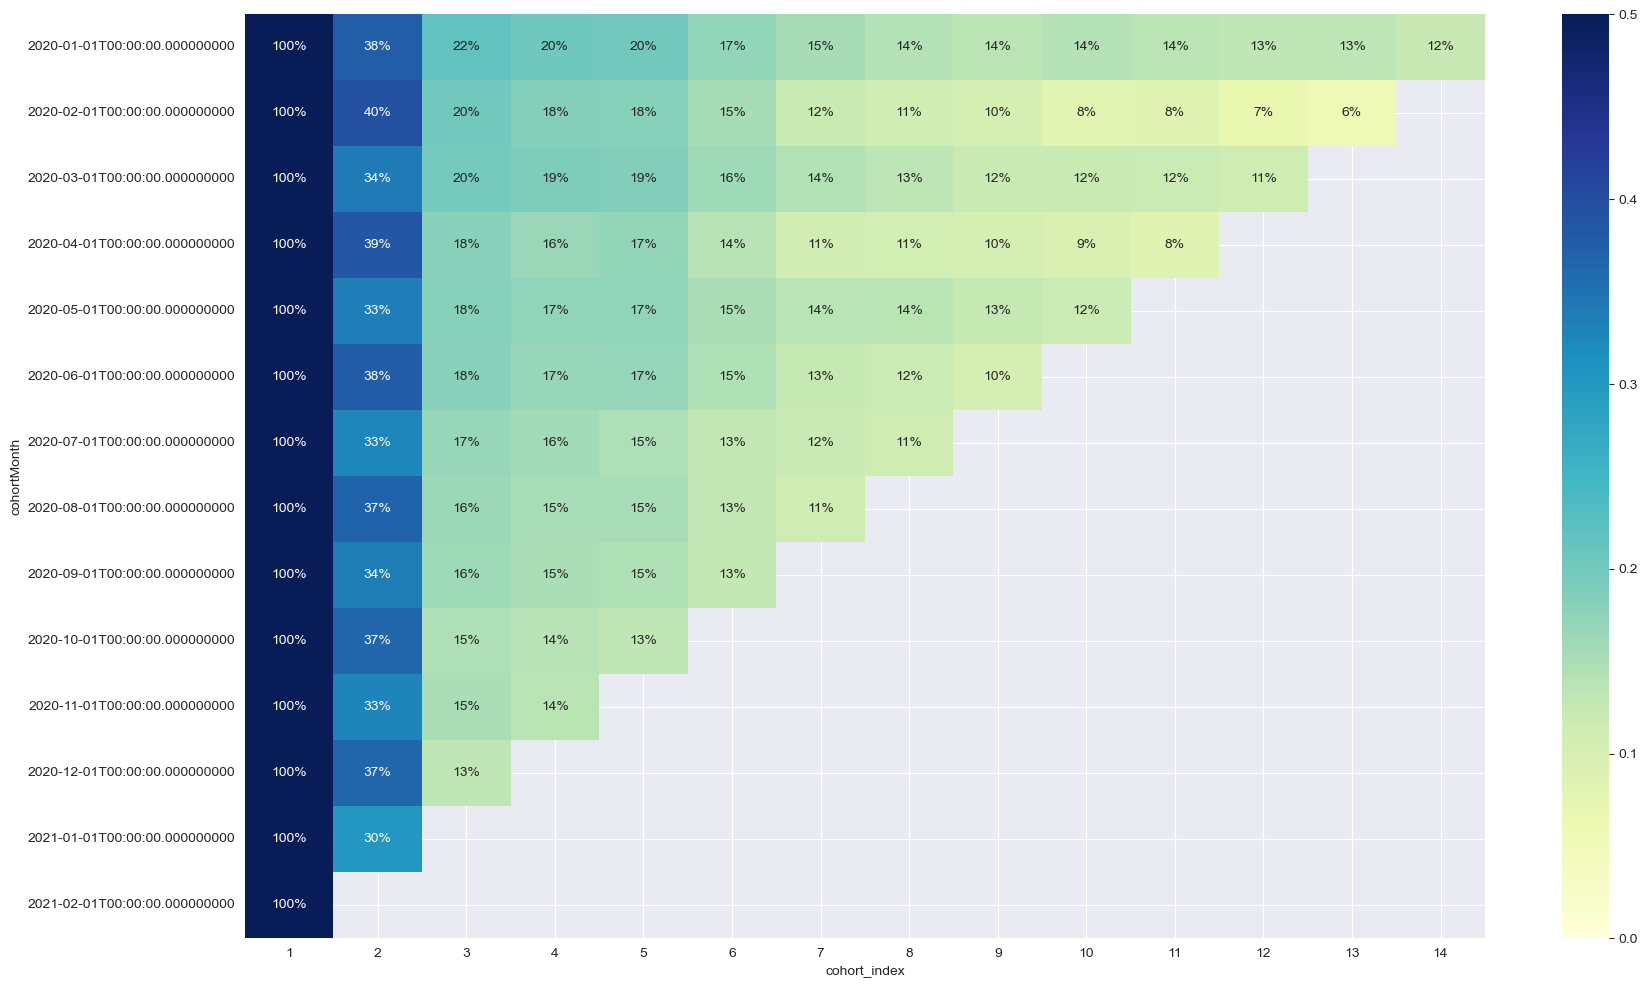

In [31]:
data2=data.pivot_table(index='cohortMonth',
                      columns='cohort_index',
                      values='user_id',
                      aggfunc=lambda x: len(x.unique()))

first_column = data2.iloc[:,0]
retention = data2.div(first_column, axis=0)

retention.round(2)

plt.figure(figsize=(20, 12))
sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap='YlGnBu')

plt.show()

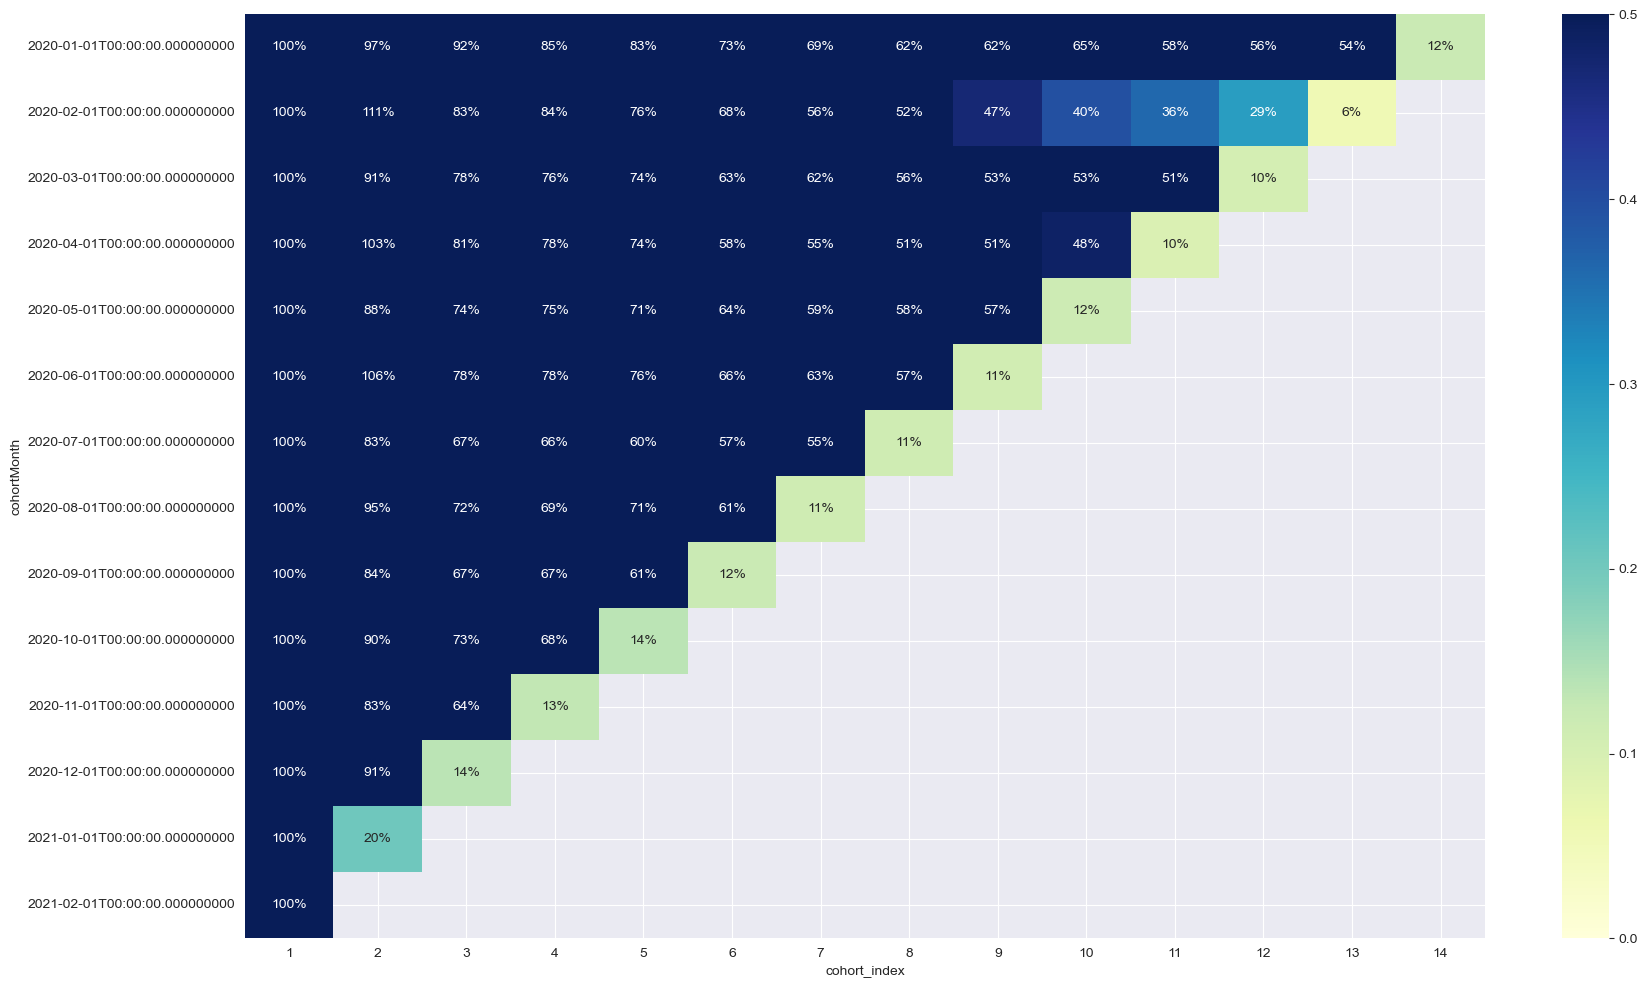

In [32]:
data3=data.pivot_table(index='cohortMonth',
                      columns='cohort_index',
                      values='price',
                      aggfunc="sum")

first_column = data3.iloc[:,0]
retention = data3.div(first_column, axis=0)

retention.round(2)

plt.figure(figsize=(20, 12))
sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap='YlGnBu')

plt.show()